# Store US Stock Prices in HDF5 Format

## Imports

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

## Load source data

In [2]:
df = pd.read_csv('us_stocks.csv')

In [3]:
df.tail()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
15389309,ZUMZ,2018-03-21,23.80,24.60,23.6058,23.95,354092.0,0.0,1.0,23.80,24.60,23.6058,23.95,354092.0
15389310,ZUMZ,2018-03-22,23.90,24.35,23.3000,23.35,269607.0,0.0,1.0,23.90,24.35,23.3000,23.35,269607.0
15389311,ZUMZ,2018-03-23,23.55,24.20,23.4500,23.55,301584.0,0.0,1.0,23.55,24.20,23.4500,23.55,301584.0
15389312,ZUMZ,2018-03-26,23.75,24.80,23.7000,24.65,375320.0,0.0,1.0,23.75,24.80,23.7000,24.65,375320.0
15389313,ZUMZ,2018-03-27,24.65,24.65,23.3500,23.60,403884.0,0.0,1.0,24.65,24.65,23.3500,23.60,403884.0


## Apply required transformations

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15389314 entries, 0 to 15389313
Data columns (total 14 columns):
 #   Column       Dtype         
---  ------       -----         
 0   ticker       object        
 1   date         datetime64[ns]
 2   open         float64       
 3   high         float64       
 4   low          float64       
 5   close        float64       
 6   volume       float64       
 7   ex-dividend  float64       
 8   split_ratio  float64       
 9   adj_open     float64       
 10  adj_high     float64       
 11  adj_low      float64       
 12  adj_close    float64       
 13  adj_volume   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 1.6+ GB


In [6]:
df = df[df['date']>='2000-01-01']

In [7]:
df

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
30,A,2000-01-03,78.75,78.94,67.3800,72.00,3343600.0,0.0,1.0,53.726454,53.856080,45.969377,49.121329,3343600.0
31,A,2000-01-04,68.13,68.88,64.7500,66.50,3408500.0,0.0,1.0,46.481058,46.992738,44.175084,45.369006,3408500.0
32,A,2000-01-05,66.25,66.31,61.3100,61.56,4119200.0,0.0,1.0,45.198445,45.239380,41.828176,41.998737,4119200.0
33,A,2000-01-06,61.63,62.00,58.1300,60.00,1812900.0,0.0,1.0,42.046493,42.298923,39.658651,40.934441,1812900.0
34,A,2000-01-07,59.06,65.94,59.0000,65.00,2016900.0,0.0,1.0,40.293135,44.986951,40.252200,44.345645,2016900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389309,ZUMZ,2018-03-21,23.80,24.60,23.6058,23.95,354092.0,0.0,1.0,23.800000,24.600000,23.605800,23.950000,354092.0
15389310,ZUMZ,2018-03-22,23.90,24.35,23.3000,23.35,269607.0,0.0,1.0,23.900000,24.350000,23.300000,23.350000,269607.0
15389311,ZUMZ,2018-03-23,23.55,24.20,23.4500,23.55,301584.0,0.0,1.0,23.550000,24.200000,23.450000,23.550000,301584.0
15389312,ZUMZ,2018-03-26,23.75,24.80,23.7000,24.65,375320.0,0.0,1.0,23.750000,24.800000,23.700000,24.650000,375320.0


In [8]:
df.set_index(['ticker', 'date'], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11343920 entries, ('A', Timestamp('2000-01-03 00:00:00')) to ('ZUMZ', Timestamp('2018-03-27 00:00:00'))
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   open         float64
 1   high         float64
 2   low          float64
 3   close        float64
 4   volume       float64
 5   ex-dividend  float64
 6   split_ratio  float64
 7   adj_open     float64
 8   adj_high     float64
 9   adj_low      float64
 10  adj_close    float64
 11  adj_volume   float64
dtypes: float64(12)
memory usage: 1.1+ GB


In [10]:
df

open   high      low  close     volume  ex-dividend  \
ticker date                                                               
A      2000-01-03  78.75  78.94  67.3800  72.00  3343600.0          0.0   
       2000-01-04  68.13  68.88  64.7500  66.50  3408500.0          0.0   
       2000-01-05  66.25  66.31  61.3100  61.56  4119200.0          0.0   
       2000-01-06  61.63  62.00  58.1300  60.00  1812900.0          0.0   
       2000-01-07  59.06  65.94  59.0000  65.00  2016900.0          0.0   
...                  ...    ...      ...    ...        ...          ...   
ZUMZ   2018-03-21  23.80  24.60  23.6058  23.95   354092.0          0.0   
       2018-03-22  23.90  24.35  23.3000  23.35   269607.0          0.0   
       2018-03-23  23.55  24.20  23.4500  23.55   301584.0          0.0   
       2018-03-26  23.75  24.80  23.7000  24.65   375320.0          0.0   
       2018-03-27  24.65  24.65  23.3500  23.60   403884.0          0.0   

                   split_ratio   adj_open   adj_high    adj_low  adj_close  \
ticker date                                                                  
A      2000-01-03          1.0  53.726454  53.856080  45.969377  49.121329   
       2000-01-04          1.0  46.481058  46.992738  44.175084  45.369006   
       2000-01-05          1.0  45.198445  45.239380  41.828176  41.998737   
       2000-01-06          1.0  42.046493  42.298923  39.658651  40.934441   
       2000-01-07          1.0  40.293135  44.986951  40.252200  44.345645   
...                        ...        ...        ...        ...        ...   
ZUMZ   2018-03-21          1.0  23.800000  24.600000  23.605800  23.950000   
       2018-03-22          1.0  23.900000  24.350000  23.300000  23.350000   
       2018-03-23          1.0  23.550000  24.200000  23.450000  23.550000   
       2018-03-26          1.0  23.750000  24.800000  23.700000  24.650000   
       2018-03-27          1.0  24.650000  24.650000  23.350000  23.600000   

                   adj_volume  
ticker date                    
A      2000-01-03   3343600.0  
       2000-01-04   3408500.0  
       2000-01-05   4119200.0  
       2000-01-06   1812900.0  
       2000-01-07   2016900.0  
...                       ...  
ZUMZ   2018-03-21    354092.0  
       2018-03-22    269607.0  
       2018-03-23    301584.0  
       2018-03-26    375320.0  
       2018-03-27    403884.0  

[11343920 rows x 12 columns]

In [11]:
df = df.filter(regex='^adj_')

In [12]:
df.columns = df.columns.str.replace('adj_', '')

In [13]:
df

open       high        low      close     volume
ticker date                                                             
A      2000-01-03  53.726454  53.856080  45.969377  49.121329  3343600.0
       2000-01-04  46.481058  46.992738  44.175084  45.369006  3408500.0
       2000-01-05  45.198445  45.239380  41.828176  41.998737  4119200.0
       2000-01-06  42.046493  42.298923  39.658651  40.934441  1812900.0
       2000-01-07  40.293135  44.986951  40.252200  44.345645  2016900.0
...                      ...        ...        ...        ...        ...
ZUMZ   2018-03-21  23.800000  24.600000  23.605800  23.950000   354092.0
       2018-03-22  23.900000  24.350000  23.300000  23.350000   269607.0
       2018-03-23  23.550000  24.200000  23.450000  23.550000   301584.0
       2018-03-26  23.750000  24.800000  23.700000  24.650000   375320.0
       2018-03-27  24.650000  24.650000  23.350000  23.600000   403884.0

[11343920 rows x 5 columns]

## Plot data

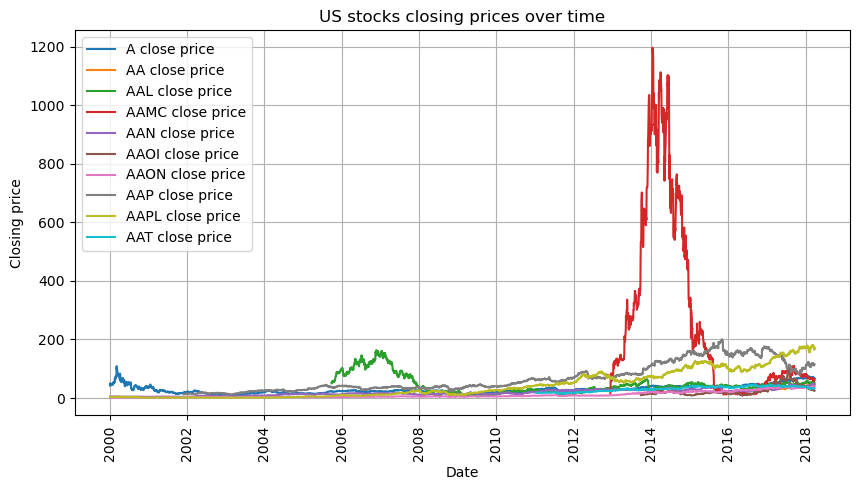

In [87]:
plt.figure(figsize=(10,5))

for ticker in df.index.get_level_values(0).unique()[:10]:
    data = df.loc[ticker]['close']
    plt.plot(data.index, data.values, label=f'{ticker} close price')

plt.title('US stocks closing prices over time')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

## Store in HDF5 format

In [14]:
df.to_hdf('us_stocks.h5', key='main_data', mode='w', format='table')